<h1>Can a large scale dewatering project replace a pumping test?</h1>
<h2>A show case of the Tim groundwater familiy by an assessment of the Vlaketunnel dewatering in 2011.</h2>

The primary goal of this notebook is to prepare the model input and observation to illustrate the use of the Tim groundwater family. All data is availale on the internet.

The notebook is presented during a workshop at the NHV Spring meeting at April 13 2023.

Prepared by Mark Bakker (TU Delft) and Hendrik Meuwese (Waterboard Scheldestromen).
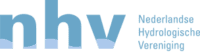

## Some Python imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import hydropandas as hpd
import pandas as pd

%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 4) # set default figure size
plt.rcParams["contour.negative_linestyle"] = 'solid' # set default line style
plt.rcParams["figure.autolayout"] = True # same at tight_layout after every plot

# The Vlaketunnel case

## Why was dewatering started?
The eastern part of the Vlaketunnel (A58 highway in province Zeeland) has lifted 10-15 cm at November 12 2010. The tunnel was closed immediately. The tunnel was stabilized by dumpertrucks and sand.

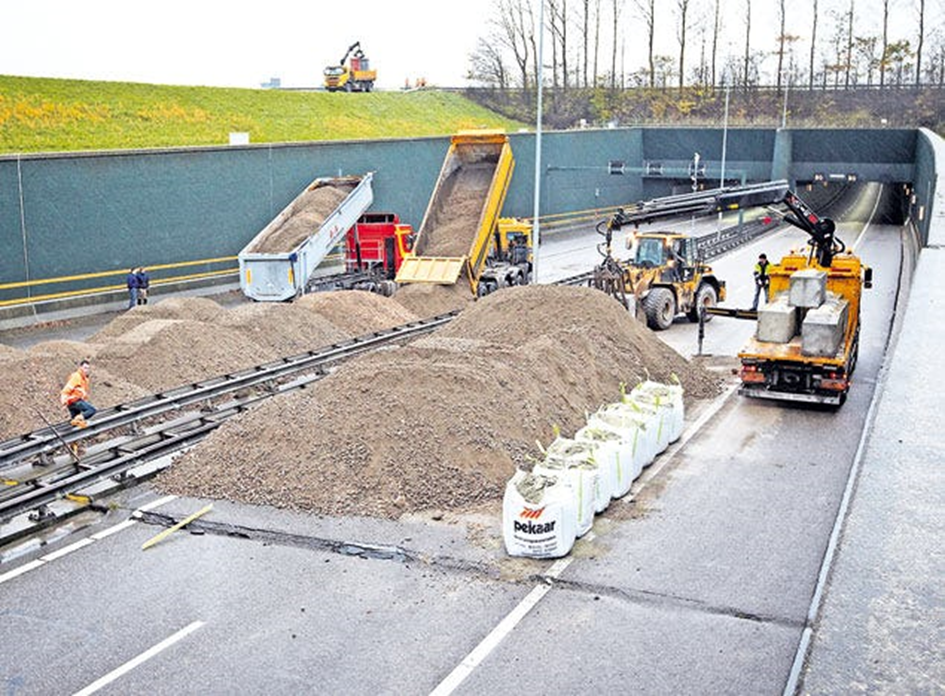

A large scale dewatering started on November 26 2010 (https://www.omroepzeeland.nl/nieuws/zld130692/schade-aan-vlaketunnel-door-kapotte-trekankers). The highest dewatering was required below the eastern part. The calculated drawdown is presented by Rijkswaterstaat during an information meeting on March 22 2011 (https://slideplayer.nl/slide/10640812/).

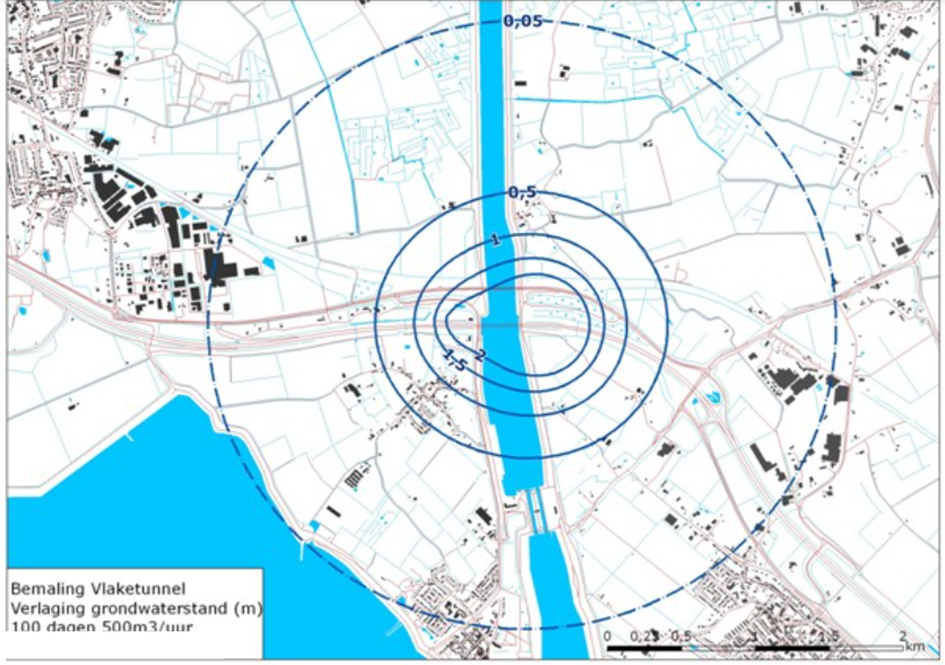

The actual discharges are presented during the same meeting. In February 2011 the actual discharge is approx. 390 m3/hr instead of expected 500 m3/hr. Easther part has largest discharge: approx. 325 m3/hour and the western part 75 m3/hour.

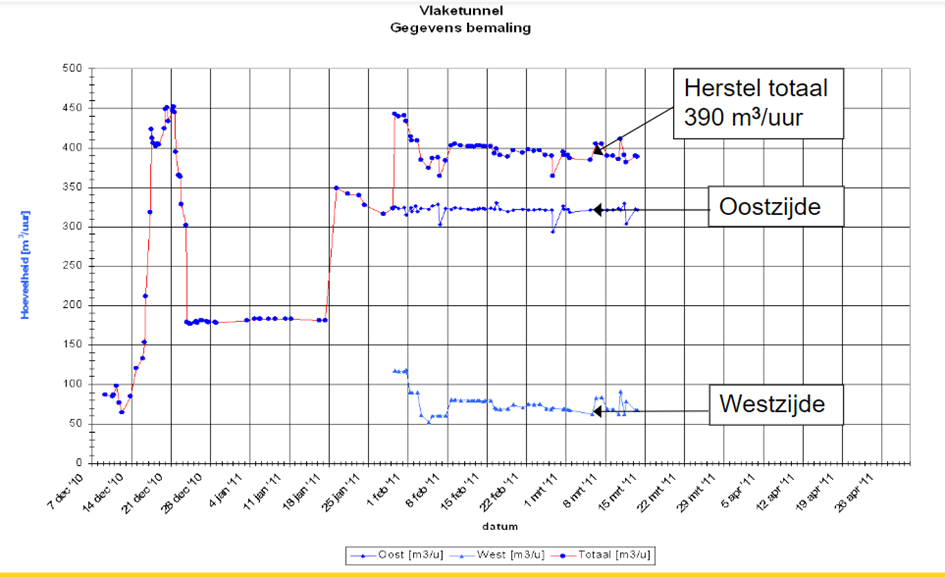

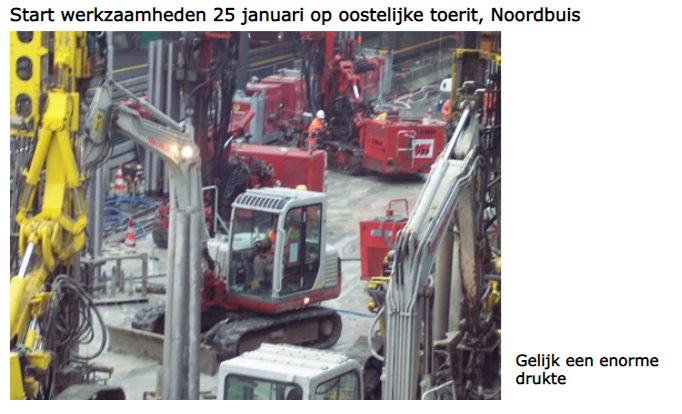

## Boundary conditions

### GeoTop
Most likely lithology according BRO GeoTop v1.5

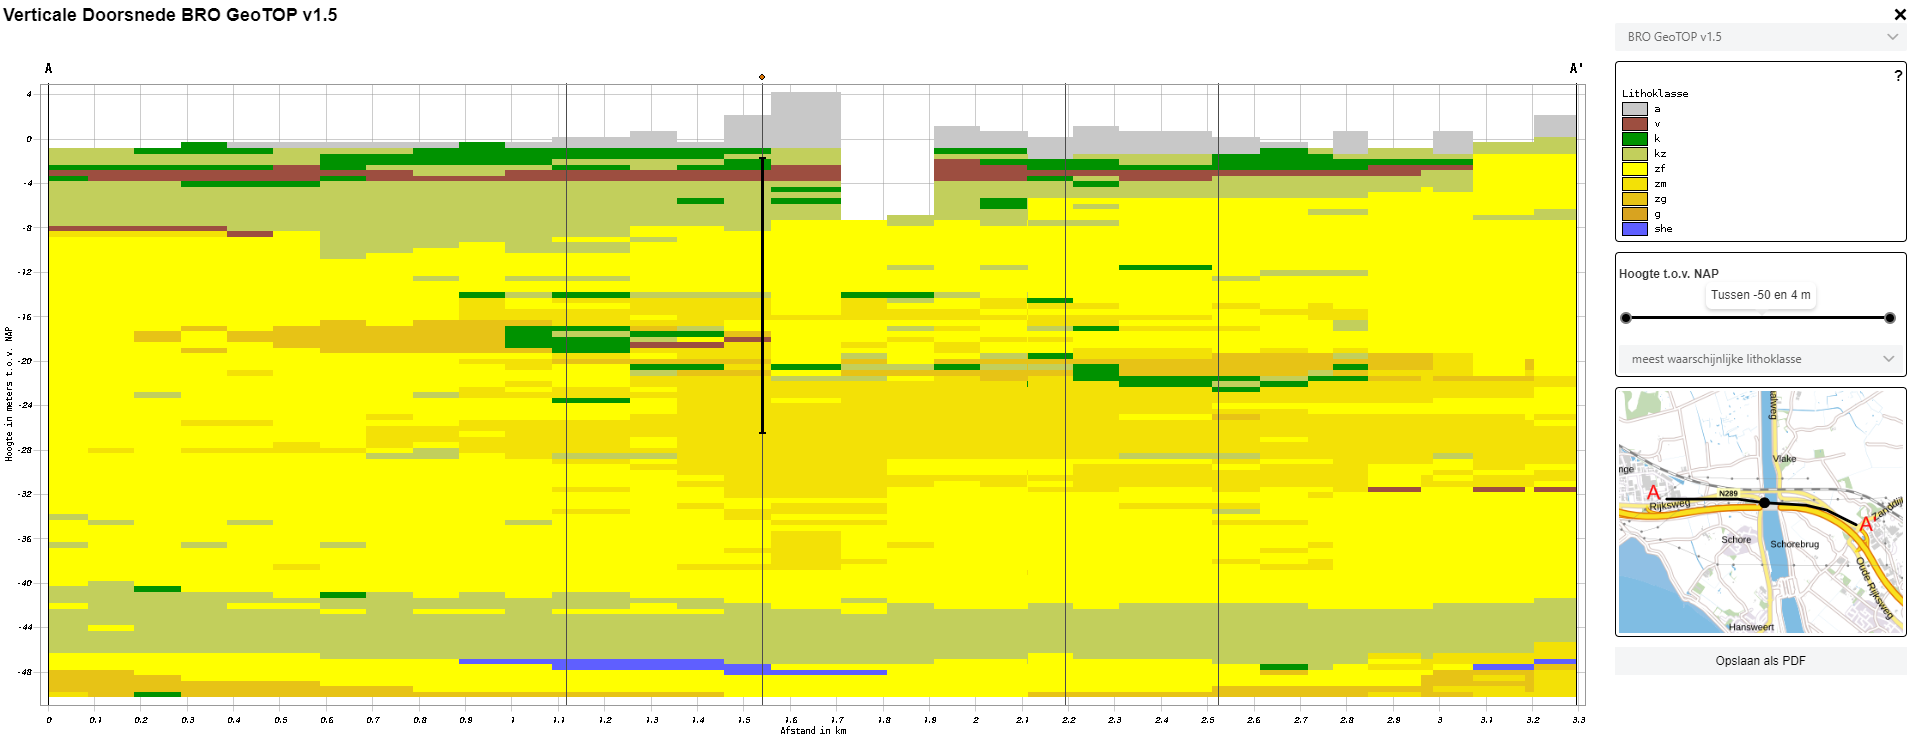

### Assessment RWS about seepage change due to proposed canal works
Assesssment https://open.rws.nl/open-overheid/onderzoeksrapporten/@247928/inschatting-kwelverandering-langs-kanaal/. Works are executed in 1990, introducing an open interface with Eastern Scheldt.
* kD: 250 m2/d
* c confining toplayer: 1.000 d
* channel resistance: 30 d

### Layer composition

| top (m NAP)  | bottom (m NAP)   |   hydrogeology | dewatering    |  channel  | kh  |
|--- |--- |--- |--- |--- | --- |
|   -1 |  -7  | confining toplayer   |    |   yes | c=1.000  |
|   -7 |  -15  | upper part aquifer   |   yes |   yes |  kh=5  |
|   -15 |  -30 | middle part aquifer   |    |    | kh=15  |
|   -30 |  -40 | lower part aquifer   |    |    | kh=5  |

### Discharge
Actual discharges are: east 325 m3/hour and the western part 75 m3/hour.

In [2]:
q_east_total = 325*24
q_east_nr_wells = 4
print(f'EAST discharge per well = {q_east_total/q_east_nr_wells} m3/day')

q_west_total = 75*24
q_west_nr_wells = 2
print(f'WEST discharge per well = {q_west_total/q_west_nr_wells} m3/day')

EAST discharge per well = 1950.0 m3/day
WEST discharge per well = 900.0 m3/day


## Observed drawdowns

### Dinoloket
Observations of all monitoring wells in the area are downloaded from Dinoloket and analysed by HyroPandas (https://github.com/ArtesiaWater/hydropandas).

In [3]:
# open downloaded data to ObsCollection
oc_dino = hpd.read_dino(dirname=r'data\gwl_dinoloket.zip')
# remove wells without screen position
oc_dino.dropna(subset='screen_top', inplace=True)
# remove observation wells in confining layer, by brute sellection on depth
oc_dino.drop(oc_dino.loc[oc_dino.screen_top > -6].index,inplace=True)
# remove wells that have a start date after December 1 2010
oc_dino.drop(oc_dino.index[oc_dino.stats.dates_first_obs > pd.Timestamp('2010-12-01')], inplace=True)
# remove wells that have a stop date before December 1 2010
oc_dino.drop(oc_dino.index[oc_dino.stats.dates_last_obs < pd.Timestamp('2010-12-01')], inplace=True)
# plot top of table
oc_dino.head()

x         y  \
name                              
B48F0203-002  59400.0  389050.0   
B48F0203-003  59400.0  389050.0   
B48F0231-002  57381.0  389003.0   
B48F0231-003  57381.0  389003.0   
B48F0232-002  58615.0  389021.0   

                                                       filename source   unit  \
name                                                                            
B48F0203-002  C:\Users\HMEUW\AppData\Local\Temp\tmpnxdtte6e\...   dino  m NAP   
B48F0203-003  C:\Users\HMEUW\AppData\Local\Temp\tmpnxdtte6e\...   dino  m NAP   
B48F0231-002  C:\Users\HMEUW\AppData\Local\Temp\tmpnxdtte6e\...   dino  m NAP   
B48F0231-003  C:\Users\HMEUW\AppData\Local\Temp\tmpnxdtte6e\...   dino  m NAP   
B48F0232-002  C:\Users\HMEUW\AppData\Local\Temp\tmpnxdtte6e\...   dino  m NAP   

             monitoring_well  tube_nr  screen_top  screen_bottom  \
name                                                               
B48F0203-002        B48F0203      2.0       -8.60          -9.60   
B48F0203-003        B48F0203      3.0      -14.40         -15.40   
B48F0231-002        B48F0231      2.0      -10.58         -11.58   
B48F0231-003        B48F0231      3.0      -14.27         -15.27   
B48F0232-002        B48F0232      2.0       -9.57         -10.57   

              ground_level  tube_top  metadata_available  \
name                                                       
B48F0203-002         -0.80     -0.14                True   
B48F0203-003         -0.80     -0.17                True   
B48F0231-002         -1.33     -0.38                True   
B48F0231-003         -1.33     -0.44                True   
B48F0232-002         -1.11     -0.45                True   

                                                            obs  
name                                                             
B48F0203-002  GroundwaterObs B48F0203-002
-----metadata-----...  
B48F0203-003  GroundwaterObs B48F0203-003
-----metadata-----...  
B48F0231-002  GroundwaterObs B48F0231-002
-----metadata-----...  
B48F0231-003  GroundwaterObs B48F0231-003
-----metadata-----...  
B48F0232-002  GroundwaterObs B48F0232-002
-----metadata-----...

In [4]:
# create some timestamps in variables
tmin = pd.Timestamp('2009-01-01')
tmax = pd.Timestamp('2012-01-01')
t_start_dewatering = pd.Timestamp('2010-11-26')
mean_dewatering_min = pd.Timestamp('2011-02-01')
mean_dewatering_max = pd.Timestamp('2011-04-01')

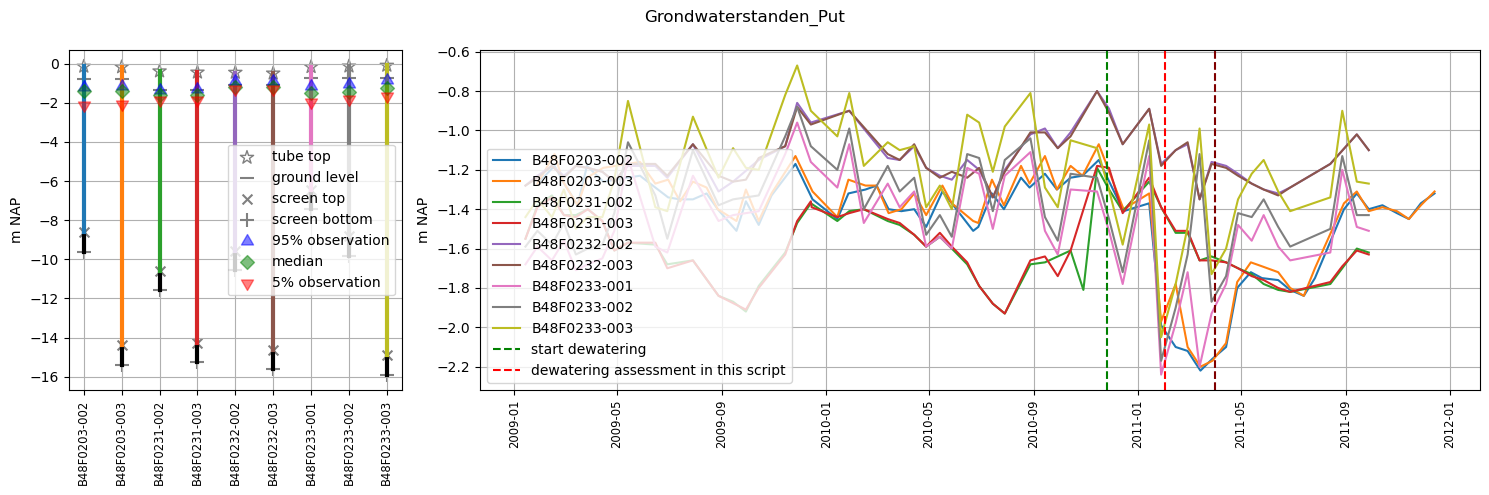

In [5]:
# plot observations in section plot
fig, axes = oc_dino.plots.section_plot(tmin=tmin,tmax=tmax)
# add some timestamps to the plot
axes[1].axvline(x=t_start_dewatering, ls='--', c='g', label='start dewatering')
axes[1].axvline(x=mean_dewatering_min, ls='--', c='r', label='dewatering assessment in this script') # pd.Timestamp('2011-02-15')
axes[1].axvline(x=mean_dewatering_max, ls='--', c='maroon', label='_dewatering assessment in this script') # pd.Timestamp('2011-02-15')
axes[1].legend(loc='lower left', fontsize=10)

In [6]:
oc_dino

x         y  \
name                              
B48F0203-002  59400.0  389050.0   
B48F0203-003  59400.0  389050.0   
B48F0231-002  57381.0  389003.0   
B48F0231-003  57381.0  389003.0   
B48F0232-002  58615.0  389021.0   
B48F0232-003  58615.0  389021.0   
B48F0233-001  58803.0  388144.0   
B48F0233-002  58803.0  388144.0   
B48F0233-003  58803.0  388144.0   

                                                       filename source   unit  \
name                                                                            
B48F0203-002  C:\Users\HMEUW\AppData\Local\Temp\tmpnxdtte6e\...   dino  m NAP   
B48F0203-003  C:\Users\HMEUW\AppData\Local\Temp\tmpnxdtte6e\...   dino  m NAP   
B48F0231-002  C:\Users\HMEUW\AppData\Local\Temp\tmpnxdtte6e\...   dino  m NAP   
B48F0231-003  C:\Users\HMEUW\AppData\Local\Temp\tmpnxdtte6e\...   dino  m NAP   
B48F0232-002  C:\Users\HMEUW\AppData\Local\Temp\tmpnxdtte6e\...   dino  m NAP   
B48F0232-003  C:\Users\HMEUW\AppData\Local\Temp\tmpnxdtte6e\...   dino  m NAP   
B48F0233-001  C:\Users\HMEUW\AppData\Local\Temp\tmpnxdtte6e\...   dino  m NAP   
B48F0233-002  C:\Users\HMEUW\AppData\Local\Temp\tmpnxdtte6e\...   dino  m NAP   
B48F0233-003  C:\Users\HMEUW\AppData\Local\Temp\tmpnxdtte6e\...   dino  m NAP   

             monitoring_well  tube_nr  screen_top  screen_bottom  \
name                                                               
B48F0203-002        B48F0203      2.0       -8.60          -9.60   
B48F0203-003        B48F0203      3.0      -14.40         -15.40   
B48F0231-002        B48F0231      2.0      -10.58         -11.58   
B48F0231-003        B48F0231      3.0      -14.27         -15.27   
B48F0232-002        B48F0232      2.0       -9.57         -10.57   
B48F0232-003        B48F0232      3.0      -14.61         -15.61   
B48F0233-001        B48F0233      1.0       -6.45          -7.45   
B48F0233-002        B48F0233      2.0       -8.81          -9.81   
B48F0233-003        B48F0233      3.0      -14.89         -15.89   

              ground_level  tube_top  metadata_available  \
name                                                       
B48F0203-002         -0.80     -0.14                True   
B48F0203-003         -0.80     -0.17                True   
B48F0231-002         -1.33     -0.38                True   
B48F0231-003         -1.33     -0.44                True   
B48F0232-002         -1.11     -0.45                True   
B48F0232-003         -1.11     -0.49                True   
B48F0233-001         -0.71     -0.16                True   
B48F0233-002         -0.71     -0.13                True   
B48F0233-003         -0.71     -0.09                True   

                                                            obs  
name                                                             
B48F0203-002  GroundwaterObs B48F0203-002
-----metadata-----...  
B48F0203-003  GroundwaterObs B48F0203-003
-----metadata-----...  
B48F0231-002  GroundwaterObs B48F0231-002
-----metadata-----...  
B48F0231-003  GroundwaterObs B48F0231-003
-----metadata-----...  
B48F0232-002  GroundwaterObs B48F0232-002
-----metadata-----...  
B48F0232-003  GroundwaterObs B48F0232-003
-----metadata-----...  
B48F0233-001  GroundwaterObs B48F0233-001
-----metadata-----...  
B48F0233-002  GroundwaterObs B48F0233-002
-----metadata-----...  
B48F0233-003  GroundwaterObs B48F0233-003
-----metadata-----...

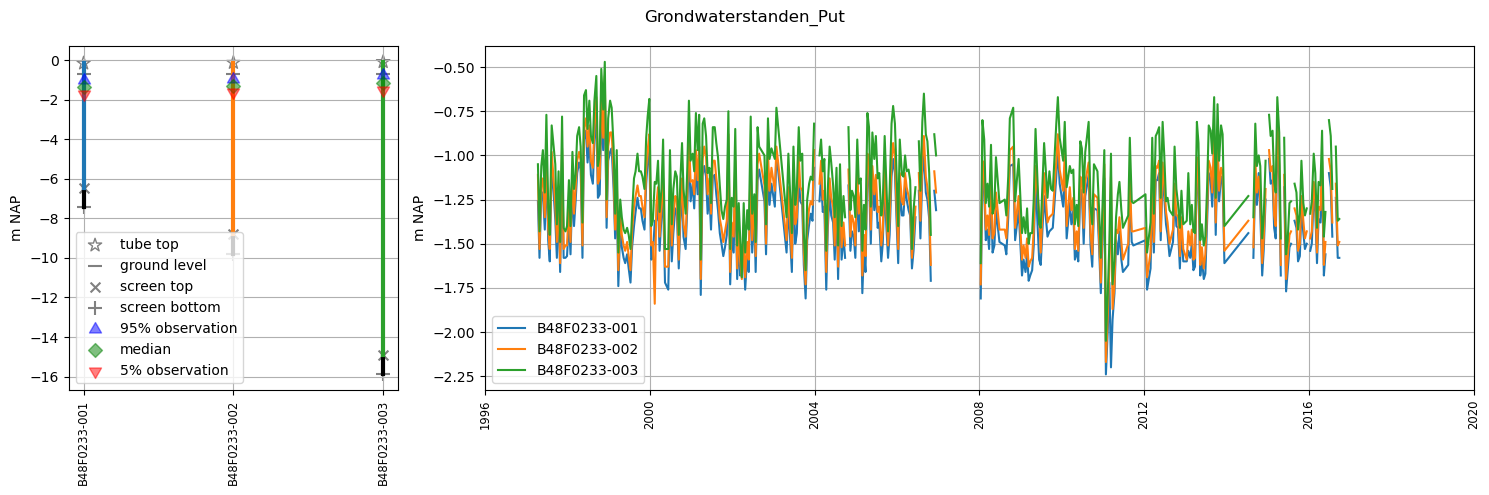

In [7]:
# plot observations in section plot
fig, axes = oc_dino.loc[oc_dino.monitoring_well == 'B48F0233'].plots.section_plot() #tmin=tmin,tmax=tmax)
# add some timestamps to the plot
#axes[1].axvline(x=t_start_dewatering, ls='--', c='g', label='start dewatering')
#axes[1].axvline(x=mean_dewatering_min, ls='--', c='r', label='dewatering assessment in this script') # pd.Timestamp('2011-02-15')
#axes[1].axvline(x=mean_dewatering_max, ls='--', c='maroon', label='_dewatering assessment in this script') # pd.Timestamp('2011-02-15')
axes[1].legend(loc='lower left', fontsize=10)

In [8]:
# calculate drawdown for all wells
for index, row in oc_dino.iterrows():
    # calculate mean grondwater levels, append to oc collection
    oc_dino.loc[index,'mean_before'] = row.obs[tmin:t_start_dewatering].stand_m_tov_nap.mean()
    oc_dino.loc[index,'mean_during'] = row.obs[mean_dewatering_min:mean_dewatering_max].stand_m_tov_nap.mean()

# calculate dh
oc_dino['dh_obs'] = oc_dino['mean_before'] - oc_dino['mean_during']
    
# 2 screens have no grondwater level to NAP, but only stand_cm_tov_mv
for index, row in oc_dino.loc[oc_dino.monitoring_well=='B48F0234'].iterrows():
    # calculate mean grondwater levels, save not to data frame because reference is not NAP
    mean_before = row.obs[tmin:t_start_dewatering].stand_cm_tov_mv.mean() / 100
    mean_during = row.obs[mean_dewatering_min:mean_dewatering_max].stand_cm_tov_mv.mean() / 100
    # drawdown for surface level observation is during minus before
    oc_dino.loc[index,'dh_obs'] = mean_during - mean_before

In [9]:
oc_dino.plots.interactive_map(tmin=tmin, tmax=tmax)

### Local observations

Data of pb6 is available via Rijkswaterstaat presentation to stakeholders. Required drawdown below tunnel is reported for December 2010 dewatering, assumed that same dewatering is achieved during February 2011 dewatering.

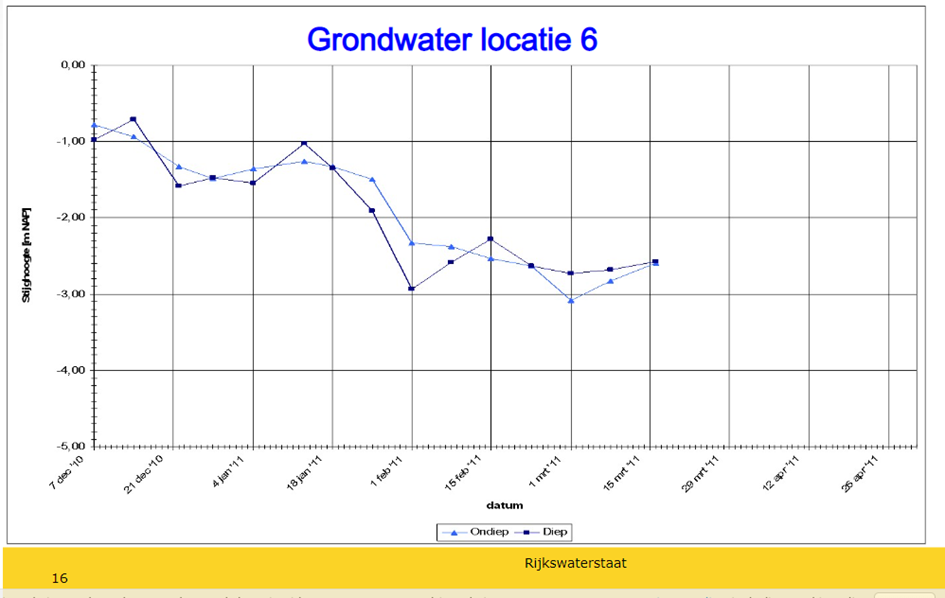

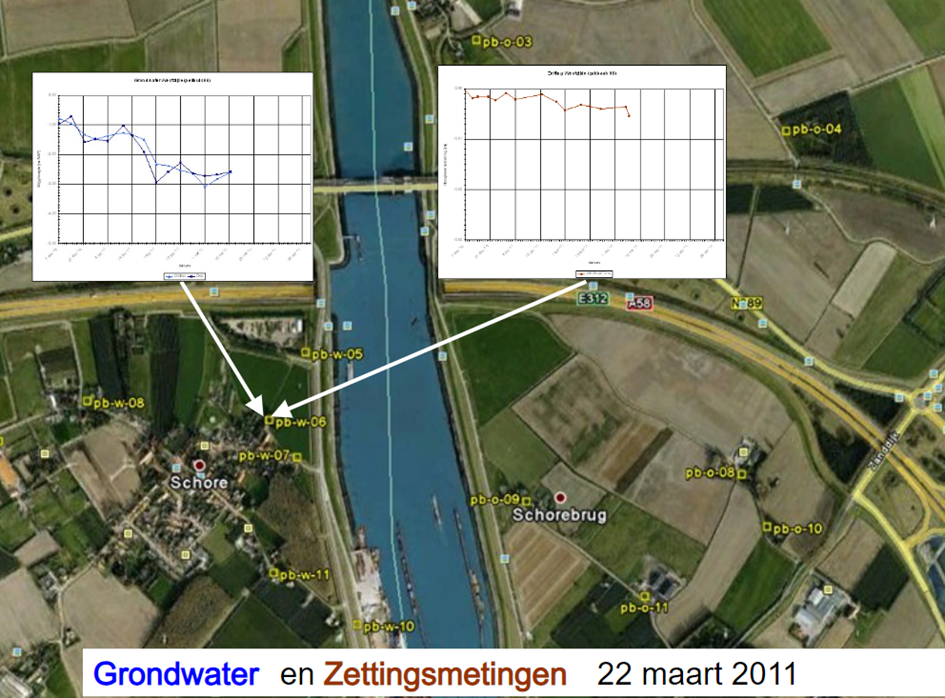

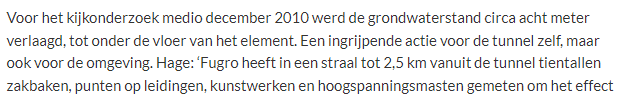
https://www.gwwtotaal.nl/2011/06/21/volautomatische-monitoring-na-opdrijven-tunnelmoot-vlaketunnel/

In [10]:
from collections import defaultdict

# create example dictonary
dict_dh_not_dino = defaultdict(list)
dict_dh_not_dino["name"] = ['pb6', 'eastern tunnel']
dict_dh_not_dino["x"] = [58774, 59313]
dict_dh_not_dino["y"] = [386980, 387345]
dict_dh_not_dino["screen_top"] = [-10, -10]
dict_dh_not_dino["tube_nr"] = [1, 1]
dict_dh_not_dino["dh_obs"] = [-1-(-3),8]
        
df_dh_not_dino = pd.DataFrame(dict_dh_not_dino).set_index('name')
df_dh_not_dino

x       y  screen_top  tube_nr  dh_obs
name                                                      
pb6             58774  386980         -10        1       2
eastern tunnel  59313  387345         -10        1       8

### Merge to one DataFrame

For easy use during model phase. Add distance to eastern tunnel.

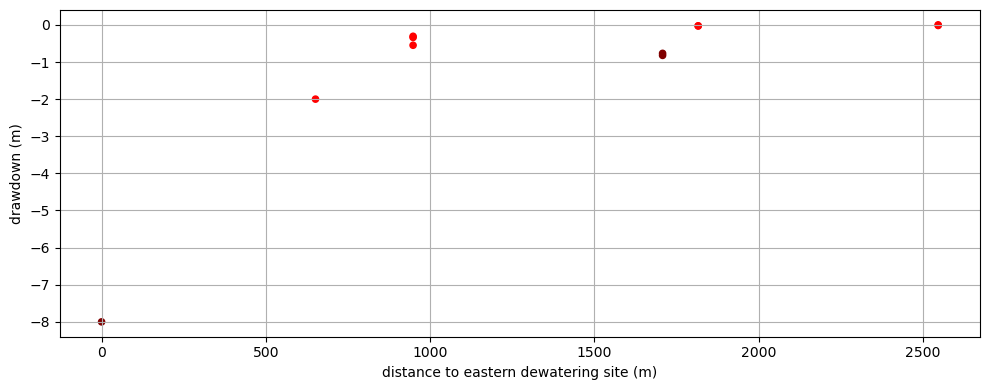

In [11]:
df_dh = pd.concat([df_dh_not_dino, pd.DataFrame(oc_dino[['x','y','screen_top','tube_nr','dh_obs',]])])
df_dh['ha'] = 'left'
df_dh['va'] = 'top'
df_dh.loc[df_dh.tube_nr==2,'va']='bottom'
df_dh.loc[df_dh.tube_nr==3,'ha']='right'
df_dh['color'] = 'r'
df_dh.loc[df_dh.x > 59000, 'color'] = 'maroon'
df_dh['r'] = np.sqrt(((df_dh.x - df_dh.loc['eastern tunnel','x']) ** 2) + ((df_dh.y - df_dh.loc['eastern tunnel','y']) ** 2) )
df_dh.sort_values('r',inplace=True)
df_dh.dh_obs *= -1
df_dh.plot.scatter(x='r', y='dh_obs', c='color', xlabel='distance to eastern dewatering site (m)', ylabel='drawdown (m)', figsize=(10,4), grid=True);

### Polder

Actual water level in polder NAP -2.4 m.

# Save data for import in TimML model script

In [12]:
df_dh.to_pickle(r'data/df_dh.pkl')